In [1]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

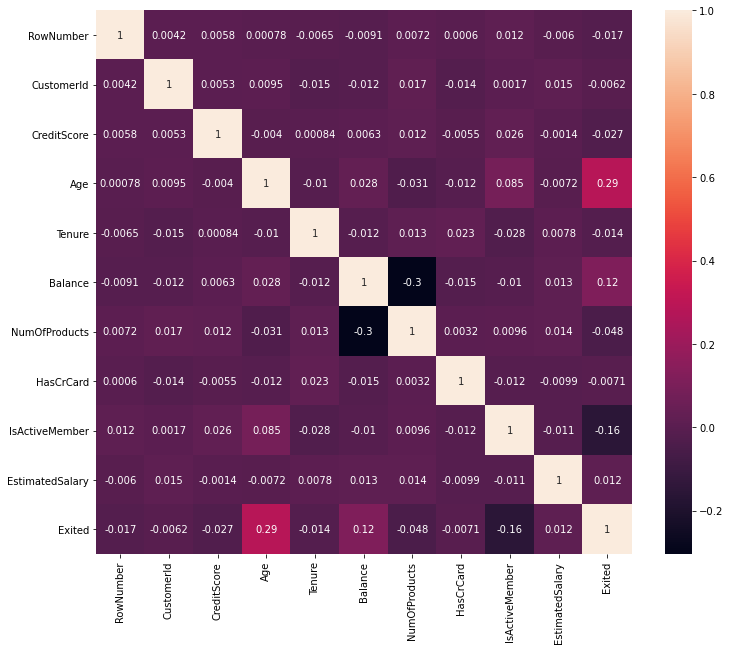

In [9]:
plt.figure(figsize = (12,10))

sns.heatmap(df.corr(),annot=True)

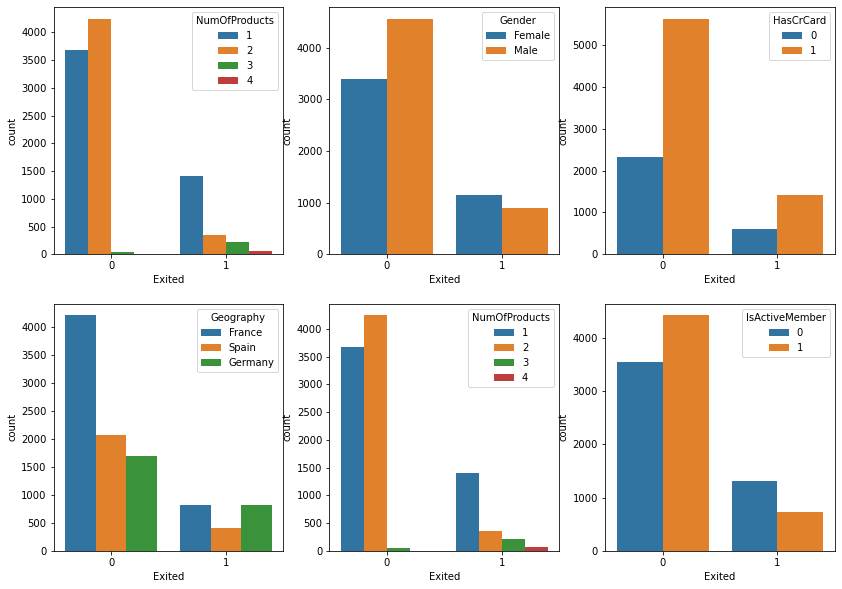

In [10]:
f, axes = plt.subplots(2, 3,figsize = (14,10) );
sns.countplot(df['Exited'],hue=df['NumOfProducts'], ax=axes[0,0]);
sns.countplot(df['Exited'],hue=df['Gender'], ax=axes[0,1]);
sns.countplot(df['Exited'],hue=df['Geography'], ax=axes[1,0]);
sns.countplot(df['Exited'],hue=df['NumOfProducts'], ax=axes[1,1]);
sns.countplot(df['Exited'],hue=df['HasCrCard'], ax=axes[0,2]);
sns.countplot(df['Exited'],hue=df['IsActiveMember'], ax=axes[1,2]);

In [11]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

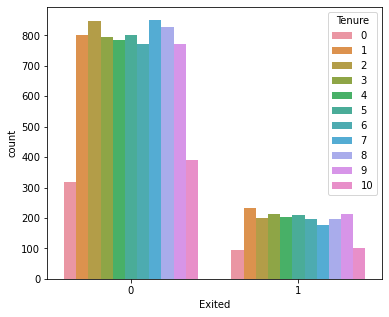

In [12]:
plt.figure(figsize = (6,5))

sns.countplot(df['Exited'],hue=df['Tenure'])

As per the above figure one can conclude that porpotions of all the tenure in both exited state are almost equal. So in our prediction model we will exclude the Tenure.

In [14]:
data = df

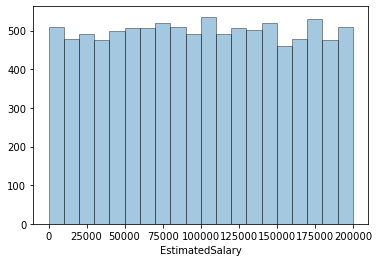

In [15]:
sns.distplot(data.EstimatedSalary,  bins=np.arange(min(data.EstimatedSalary), max(data.EstimatedSalary) + 10000, 10000), kde=False, hist_kws=dict(ec="k"))

As per above figure , frequecy of EstimatedSalary in all bins are aroud same level so we will not consider adding estimatedsalary in our prediction model 

In [33]:

# label encoding the data 
from sklearn.preprocessing import LabelEncoder 

data = df
le = LabelEncoder() 
  
data['Gender']= le.fit_transform(data['Gender']) 
data['Geography']= le.fit_transform(data['Geography']) 

data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [34]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,1,1,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,0,0,28,4,130142.79,1,1,0,38190.78,0


In [35]:
data.drop(['CustomerId','RowNumber','Surname','CreditScore','EstimatedSalary'], axis=1,inplace=True)

In [36]:
data.head()

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,0,0,42,2,0.00,1,1,1,1
1,2,0,41,1,83807.86,1,0,1,0
2,0,0,42,8,159660.80,3,1,0,1
3,0,0,39,1,0.00,2,0,0,0
4,2,0,43,2,125510.82,1,1,1,0


In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 

In [38]:
y = data.Exited

features = ['Geography','Gender','Age','NumOfProducts','HasCrCard','IsActiveMember']
x = data[features]

In [39]:
x.head()

,Geography,Gender,Age,NumOfProducts,HasCrCard,IsActiveMember
0,0,0,42,1,1,1
1,2,0,41,1,0,1
2,0,0,42,3,1,0
3,0,0,39,2,0,0
4,2,0,43,1,1,1


In [40]:
X_train, X_test, y_train, y_test = train_test_split( 
          x, y, test_size = 0.3, random_state = 100)
model = DecisionTreeRegressor(random_state=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


In [41]:
y_pred_new = y_pred.round().astype(int)

In [42]:
print ("Accuracy : ",accuracy_score(y_test,y_pred_new)*100)
print("\n Confusion Matrix: \n", confusion_matrix(y_test, y_pred_new))
print("\n Report : \n",classification_report(y_test, y_pred_new))

Accuracy :  83.93333333333334

 Confusion Matrix: 
 [[2257  119]
 [ 363  261]]

 Report : 
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      2376
           1       0.69      0.42      0.52       624

    accuracy                           0.84      3000
   macro avg       0.77      0.68      0.71      3000
weighted avg       0.83      0.84      0.82      3000



 ## with balance and salary 

CreditScore
EstimatedSalary
Balance

In [19]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


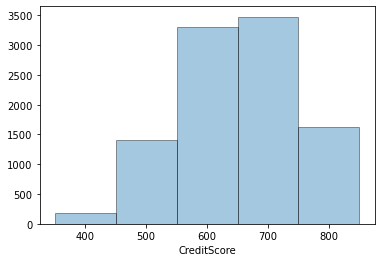

In [20]:
sns.distplot(data.CreditScore,  bins=np.arange(min(data.CreditScore), max(data.CreditScore) +100, 100), kde=False, hist_kws=dict(ec="k"))

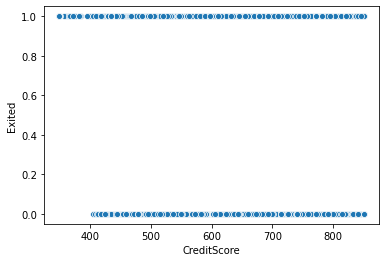

In [21]:
sns.scatterplot(data.CreditScore,data.Exited)

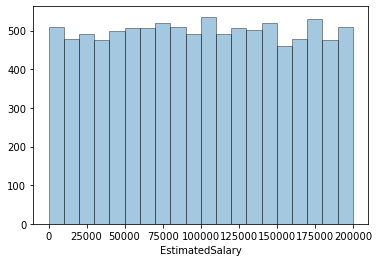

In [22]:
sns.distplot(data.EstimatedSalary,  bins=np.arange(min(data.EstimatedSalary), max(data.EstimatedSalary) +10000, 10000), kde=False, hist_kws=dict(ec="k"))

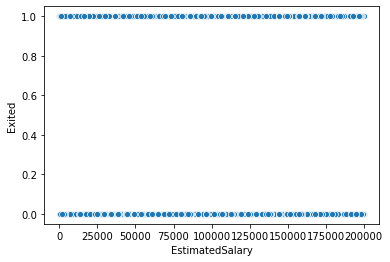

In [23]:
sns.scatterplot(data.EstimatedSalary,data.Exited)

In [24]:
y = data.Exited

features = ['Geography','Gender','Age','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','CreditScore']
x = data[features]

In [25]:
x.head()

,Geography,Gender,Age,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,CreditScore
0,0,0,42,1,1,1,101348.88,619
1,2,0,41,1,0,1,112542.58,608
2,0,0,42,3,1,0,113931.57,502
3,0,0,39,2,0,0,93826.63,699
4,2,0,43,1,1,1,79084.10,850


In [28]:
X_train, X_test, y_train, y_test = train_test_split( 
          x, y, test_size = 0.3, random_state = 100)
model = DecisionTreeRegressor(random_state=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [30]:
y_pred

array([0., 0., 0., ..., 1., 0., 1.])

In [31]:
y_pred_new = y_pred.round().astype(int)

In [32]:
print ("Accuracy : ",accuracy_score(y_test,y_pred_new)*100)
print("\n Confusion Matrix: \n", confusion_matrix(y_test, y_pred_new))
print("\n Report : \n",classification_report(y_test, y_pred_new))

Accuracy :  78.76666666666667

 Confusion Matrix: 
 [[2085  291]
 [ 346  278]]

 Report : 
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      2376
           1       0.49      0.45      0.47       624

    accuracy                           0.79      3000
   macro avg       0.67      0.66      0.67      3000
weighted avg       0.78      0.79      0.78      3000

